# Unidad 2: Estructura de los datos en series de tiempo

## 2.1 Introducción

Dado que una serie de tiempo es un conjunto de observaciones sobre los valores que toma una variable (cuantitativa) a través del tiempo, exploraremos las tendencias o cambios que se reflejan y afectan su comportamiento.

## 2.2 Acción

Ahora, en esta Unidad 2, se debe continuar con los datos presentados en dicho entregable y se debe evidenciar, en una de las variables en el tiempo, la aproximación en promedio móvil, en rezagos y en estacionalidad. Todo lo anterior, a través de funciones y gráficas que permitan detectar patrones y ciclos de la variable.

### 2.2.1 Preparación de los datos

In [38]:
# importando librerias

# librerias para la transformación de datos
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

# libreria para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# recopilación de datos
df_data = pd.read_csv('./dataset.csv',sep=';')
df_data.head()

,fechaoperacion,codigo,contenido,hora1,hora2,hora3,hora4,hora5,hora6,hora7,...,hora15,hora16,hora17,hora18,hora19,hora20,hora21,hora22,hora23,hora24
0,1/01/2006,PBNA,PRECIO DE BOLSA NACIONAL ($/KWH),87.778212,77.778212,77.778212,77.778212,77.778212,77.778212,75.768212,...,75.768212,71.278212,69.067212,76.278212,77.778212,87.778212,87.778212,77.778212,77.778212,77.778212
1,2/01/2006,PBNA,PRECIO DE BOLSA NACIONAL ($/KWH),76.278212,76.278212,76.278212,76.278212,76.278212,76.778212,76.778212,...,82.778212,82.778212,82.778212,81.768212,87.778212,87.778212,87.778212,82.778212,76.778212,76.778212
2,3/01/2006,PBNA,PRECIO DE BOLSA NACIONAL ($/KWH),77.678212,77.678212,77.678212,77.678212,77.678212,77.678212,77.678212,...,82.778212,82.778212,82.778212,82.778212,87.778212,114.425212,87.778212,82.778212,77.678212,77.678212
3,4/01/2006,PBNA,PRECIO DE BOLSA NACIONAL ($/KWH),77.778212,77.778212,77.778212,77.778212,77.778212,77.778212,77.778212,...,77.778212,77.778212,77.778212,85.778212,85.778212,87.778212,85.778212,85.778212,81.768212,77.778212
4,5/01/2006,PBNA,PRECIO DE BOLSA NACIONAL ($/KWH),86.778212,86.778212,86.778212,86.778212,86.778212,86.778212,88.278212,...,88.278212,88.278212,88.278212,88.278212,88.278212,91.134212,88.278212,88.278212,86.778212,86.778212


In [3]:
# información del dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6515 entries, 0 to 6514
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fechaoperacion  6515 non-null   object 
 1   codigo          6515 non-null   object 
 2   contenido       6515 non-null   object 
 3   hora1           6515 non-null   float64
 4   hora2           6515 non-null   float64
 5   hora3           6515 non-null   float64
 6   hora4           6515 non-null   float64
 7   hora5           6515 non-null   float64
 8   hora6           6515 non-null   float64
 9   hora7           6515 non-null   float64
 10  hora8           6515 non-null   float64
 11  hora9           6515 non-null   float64
 12  hora10          6515 non-null   float64
 13  hora11          6515 non-null   float64
 14  hora12          6515 non-null   float64
 15  hora13          6515 non-null   float64
 16  hora14          6515 non-null   float64
 17  hora15          6515 non-null   f

In [4]:
# Nombre de las columnas
df_data.columns

Index(['fechaoperacion', 'codigo', 'contenido', 'hora1', 'hora2', 'hora3',
       'hora4', 'hora5', 'hora6', 'hora7', 'hora8', 'hora9', 'hora10',
       'hora11', 'hora12', 'hora13', 'hora14', 'hora15', 'hora16', 'hora17',
       'hora18', 'hora19', 'hora20', 'hora21', 'hora22', 'hora23', 'hora24'],
      dtype='object')

In [5]:
def trf_data(df_data):
    
    # copia del dataframe
    df = df_data.copy()
    
    # transformación de fechas
    df['fechaoperacion'] = pd.to_datetime(df['fechaoperacion'], format='%d/%m/%Y')
    
    # agregando las columnas de fechas
    df['ano'] = df.apply(lambda x: x['fechaoperacion'].year ,axis=1)
    df['mes'] = df.apply(lambda x: x['fechaoperacion'].month ,axis=1)
    df['dia'] = df.apply(lambda x: x['fechaoperacion'].day ,axis=1)
    
    # selección de columnas
    df = df[['fechaoperacion','ano','mes','dia', 'hora1', 'hora2', 'hora3','hora4', 'hora5', 'hora6', 'hora7', 'hora8', 'hora9', 'hora10','hora11', 'hora12', 'hora13', 'hora14', 'hora15', 'hora16', 'hora17','hora18', 'hora19', 'hora20', 'hora21', 'hora22', 'hora23', 'hora24']]
    
    # Convertir la tabla
    list_id = [i.lower() for i in df.columns if not 'hora' in i]
    list_value = [i.lower() for i in df.columns if 'hora' in i]
    
    # pivotear la tabla
    df = df.melt(id_vars=list_id,value_vars=list_value,var_name='periodo',value_name='valor')
    
    return df

In [6]:
# dataset trasnformado
df = trf_data(df_data)
df.head()

,fechaoperacion,ano,mes,dia,periodo,valor
0,2006-01-01,2006,1,1,hora1,87.778212
1,2006-01-02,2006,1,2,hora1,76.278212
2,2006-01-03,2006,1,3,hora1,77.678212
3,2006-01-04,2006,1,4,hora1,77.778212
4,2006-01-05,2006,1,5,hora1,86.778212


In [7]:
dic_fec = {'fec_ini': df['fechaoperacion'].min(),
           'fec_fin': df['fechaoperacion'].max()}
dic_fec

{'fec_ini': Timestamp('2006-01-01 00:00:00'),
 'fec_fin': Timestamp('2023-12-31 00:00:00')}

In [23]:
# creando copia del dataframe original
# df_vm = df.copy() 

# # seleccionando las columnas
# df_vm = df_vm[['ano','mes','valor']]

# # agrupando los precios de oferta por mes
# df_vm = df_vm.groupby(['ano','mes']).mean().reset_index()

# # creando columna fechaoperacion ano-mes
# df_vm['fechaoperacion'] = df_vm.apply(lambda x: datetime(int(x['ano']),int(x['mes']),1),axis=1)

# df_vm = df_vm[['fechaoperacion','ano','mes','valor']]
# df_vm.head()

,fechaoperacion,ano,mes,valor
0,2006-01-01,2006,1,79.026486
1,2006-02-01,2006,2,75.520919
2,2006-03-01,2006,3,65.787447
3,2006-04-01,2006,4,54.012347
4,2006-05-01,2006,5,53.819582


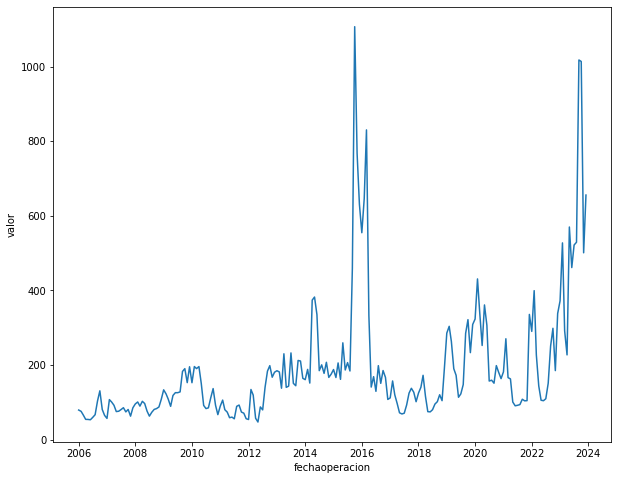

In [24]:
# creando grafico
plt.figure(figsize=(10,8))

# creando gráfico de linea
sns.lineplot(data=df_vm,x='fechaoperacion',y='valor')

# monstrando gráfico
plt.show()

### 2.2.2 Funciones para detectar patrones y ciclos de la variable

#### Caso Base (Mensual): Promedio Movil

In [8]:
# creando función para remuestrar movilmente el dataset, usando la función resample
def df_resample(data,target='fechaoperacion',type='M'):
    
    # creando copia del dataset original
    df = data.copy()
    
    # remuestrear el dataset
    df = df.resample(type,on=target).mean().reset_index()
    
    # ordenando el dataframe
    df = df[['fechaoperacion','valor']]
    
    return df

In [9]:
# creando una copia del dataframe transformado
df_vcm = df.copy()

# remuestreando el dataframe en frecuencia mensual
df_vcm = df_resample(df_vcm)

# muestra
df_vcm.head()

,fechaoperacion,valor
0,2006-01-31,79.026486
1,2006-02-28,75.520919
2,2006-03-31,65.787447
3,2006-04-30,54.012347
4,2006-05-31,53.819582


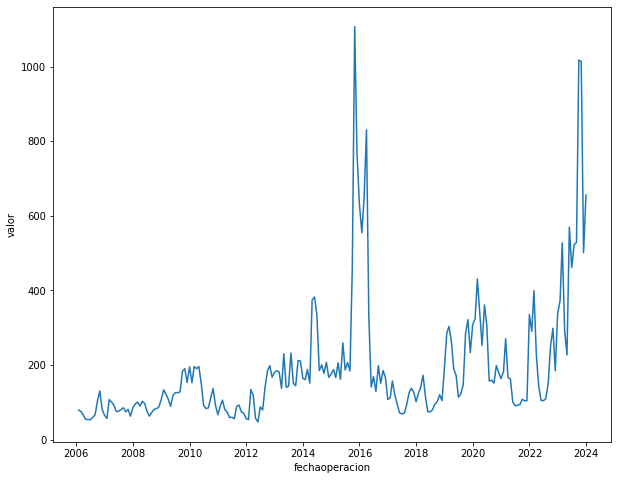

In [10]:
# creando grafico
plt.figure(figsize=(10,8))

# creando gráfico de linea
sns.lineplot(data=df_vcm,x='fechaoperacion',y='valor')

# monstrando gráfico
plt.show()

#### Caso Base (Mensual): Rezagos

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

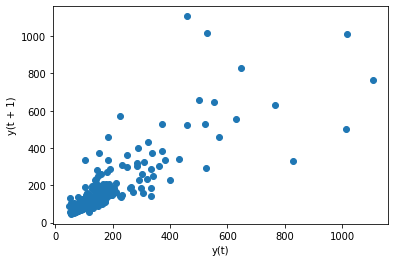

In [12]:
pd.plotting.lag_plot(df_vcm['valor'], lag=1)

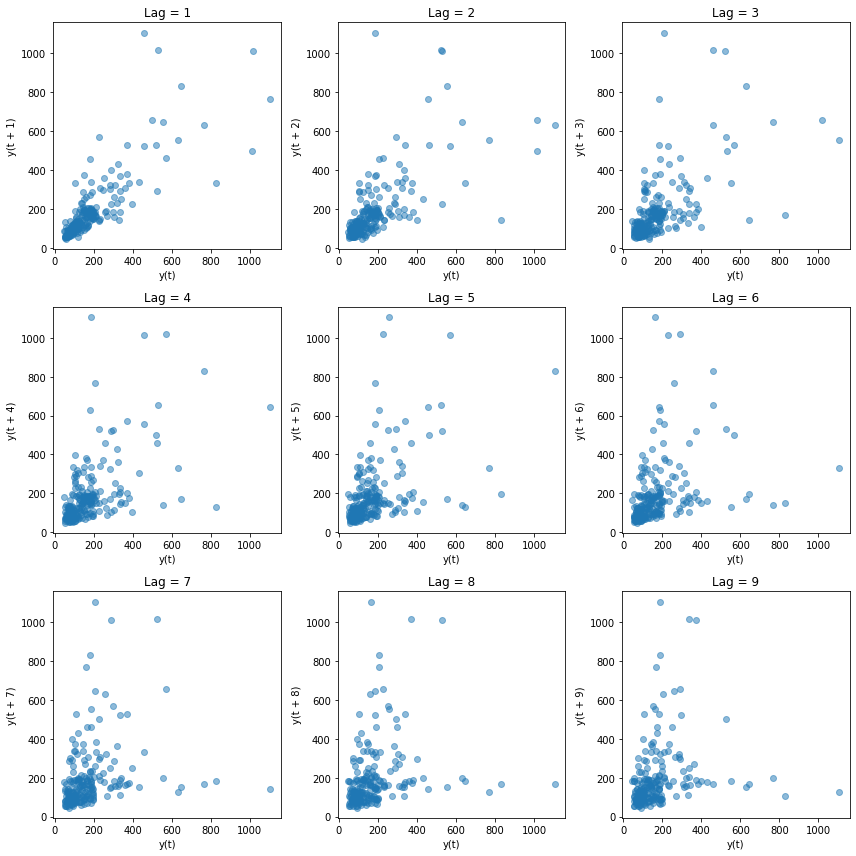

In [13]:
# Creando función para gráficar los rezagos del dataset

# Crear un panel de gráficos 3x3
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterar sobre las filas y columnas del panel
for i in range(3):
    for j in range(3):
        lag = i * 3 + j + 1  # Calcular el lag correspondiente
        ax = axes[i, j]  # Obtener el eje actual
        
        # Calcular y graficar el lag plot con el lag actual
        ax.plot(df_vcm['valor'][:-lag], df_vcm['valor'][lag:], 'o', alpha=0.5)
        ax.set_title(f'Lag = {lag}')
        ax.set_xlabel('y(t)')
        ax.set_ylabel(f'y(t + {lag})')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

#### Caso Base (Mensual): Estacionalidad

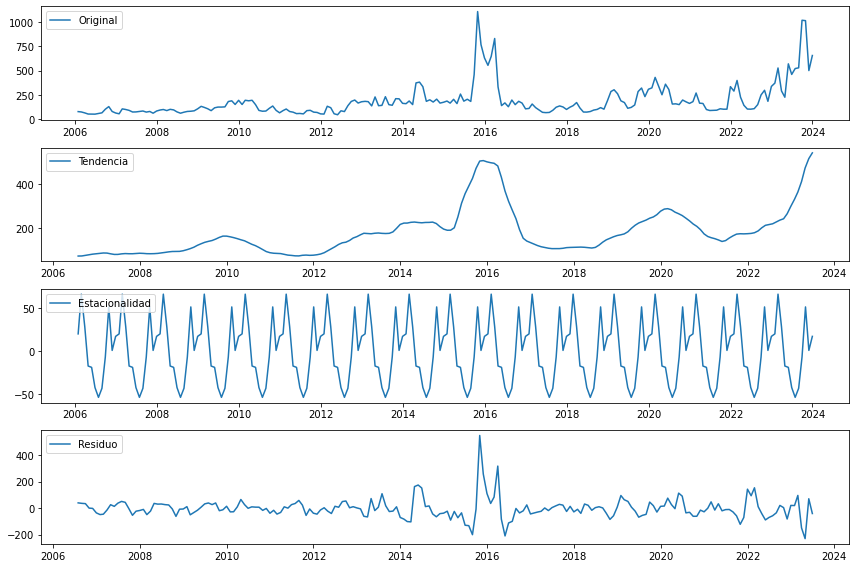

In [15]:
# Establecer 'fechaoperacion' como el índice del DataFrame
df_vcm.set_index('fechaoperacion', inplace=True)

# Asegúrate de que la frecuencia esté definida (por ejemplo, mensual 'M')
df_vcm.index.freq = 'M'

# Realizar la descomposición estacional de la serie temporal
result = seasonal_decompose(df_vcm['valor'], model='additive')

# Graficar la serie original, la tendencia, la estacionalidad y el residuo
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df_vcm['valor'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuo')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

#### Caso 1 (Trimestre): Promedio Movil

In [17]:
# creando una copia 
df_vct = df.copy()

# remuestreando a trimestre
df_vct = df_resample(df_vct,type='Q')

# muestra
df_vct.head()

,fechaoperacion,valor
0,2006-03-31,73.375752
1,2006-06-30,53.608199
2,2006-09-30,76.138937
3,2006-12-31,92.003498
4,2007-03-31,102.905929


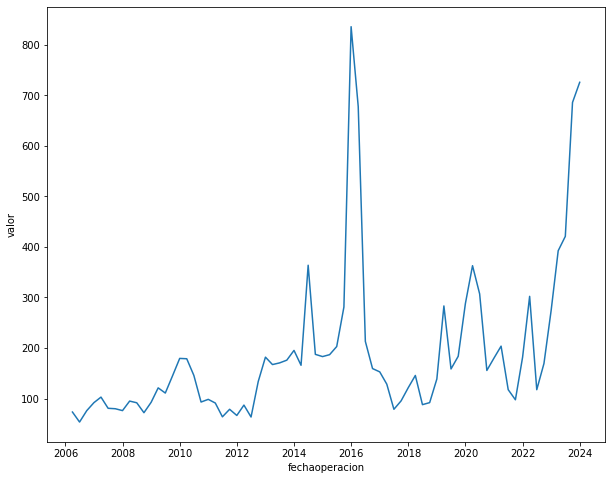

In [18]:
# creando grafico
plt.figure(figsize=(10,8))

# creando gráfico de linea
sns.lineplot(data=df_vct,x='fechaoperacion',y='valor')

# monstrando gráfico
plt.show()

#### Caso 1 (Trimestre): Rezagos

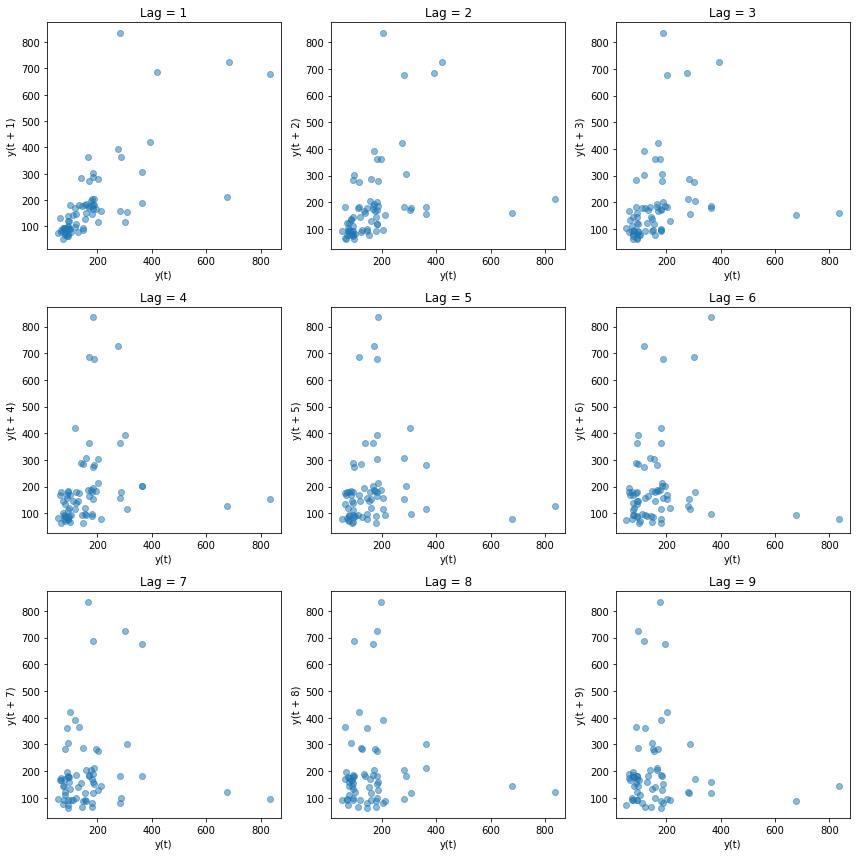

In [19]:

# Crear un panel de gráficos 3x3
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterar sobre las filas y columnas del panel
for i in range(3):
    for j in range(3):
        lag = i * 3 + j + 1  # Calcular el lag correspondiente
        ax = axes[i, j]  # Obtener el eje actual
        
        # Calcular y graficar el lag plot con el lag actual
        ax.plot(df_vct['valor'][:-lag], df_vct['valor'][lag:], 'o', alpha=0.5)
        ax.set_title(f'Lag = {lag}')
        ax.set_xlabel('y(t)')
        ax.set_ylabel(f'y(t + {lag})')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

#### Caso 1 (Trimestre): Estacionalidad

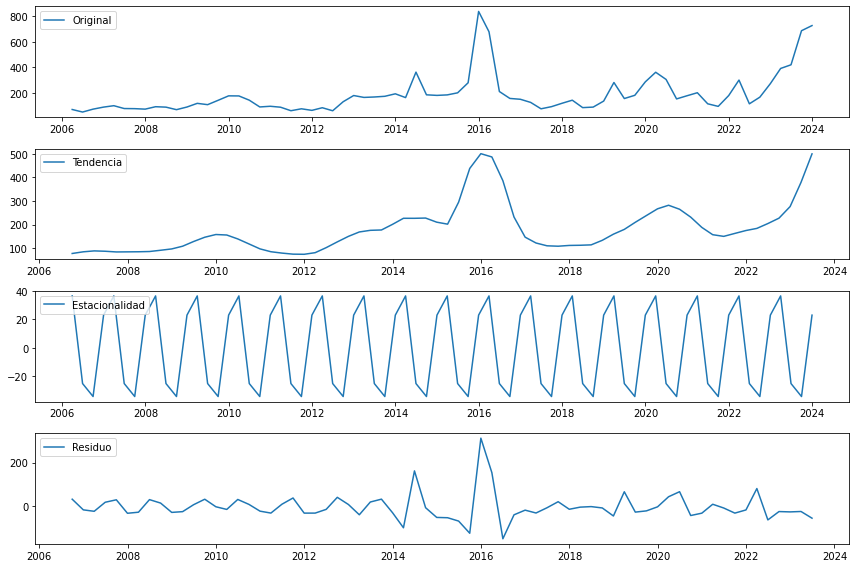

In [25]:
# Establece 'fechaoperacion' como el índice del DataFrame
df_vct.set_index('fechaoperacion', inplace=True)

# Asegúrate de que la frecuencia esté definida (por ejemplo, mensual 'M')
df_vct.index.freq = 'Q'

# Realizar la descomposición estacional de la serie temporal
result = seasonal_decompose(df_vct['valor'], model='additive')

# Graficar la serie original, la tendencia, la estacionalidad y el residuo
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df_vct['valor'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuo')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

#### Caso 2 (Semestre): Promedio Movil

In [26]:
# creando una copia 
df_vcs = df.copy()

# remuestreando de acuerdo a lo que se quiere trimestre
df_vcs = df_resample(df_vcs,type='2Q')

# muestra
df_vcs.head()

,fechaoperacion,valor
0,2006-03-31,73.375752
1,2006-09-30,64.935127
2,2007-03-31,96.307089
3,2007-09-30,80.349321
4,2008-03-31,85.574471


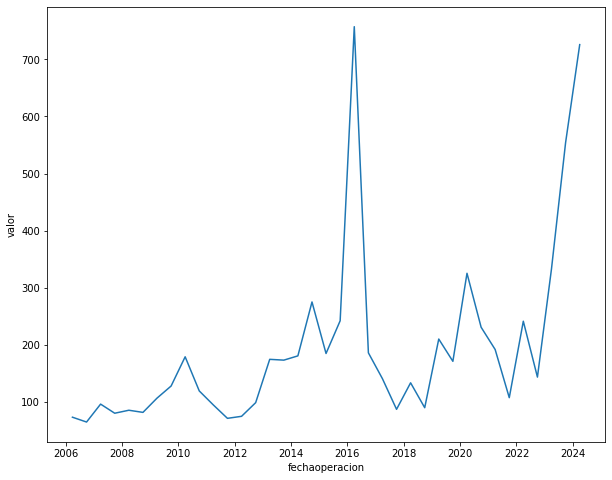

In [27]:
# creando grafico
plt.figure(figsize=(10,8))

# creando gráfico de linea
sns.lineplot(data=df_vcs,x='fechaoperacion',y='valor')

# monstrando gráfico
plt.show()

#### Caso 2 (Semestre): Rezagos

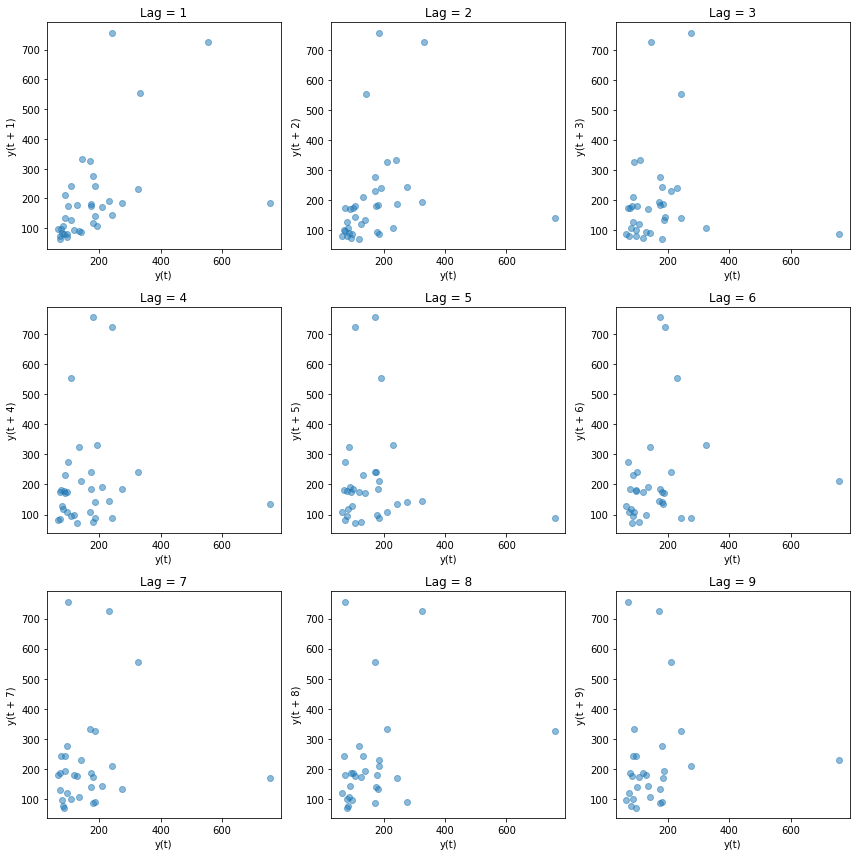

In [28]:
# Crear un panel de gráficos 3x3
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterar sobre las filas y columnas del panel
for i in range(3):
    for j in range(3):
        lag = i * 3 + j + 1  # Calcular el lag correspondiente
        ax = axes[i, j]  # Obtener el eje actual
        
        # Calcular y graficar el lag plot con el lag actual
        ax.plot(df_vcs['valor'][:-lag], df_vcs['valor'][lag:], 'o', alpha=0.5)
        ax.set_title(f'Lag = {lag}')
        ax.set_xlabel('y(t)')
        ax.set_ylabel(f'y(t + {lag})')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

In [29]:
df_vcs.head()

,fechaoperacion,valor
0,2006-03-31,73.375752
1,2006-09-30,64.935127
2,2007-03-31,96.307089
3,2007-09-30,80.349321
4,2008-03-31,85.574471


#### Caso 2 (Semestre): Estacionalidad

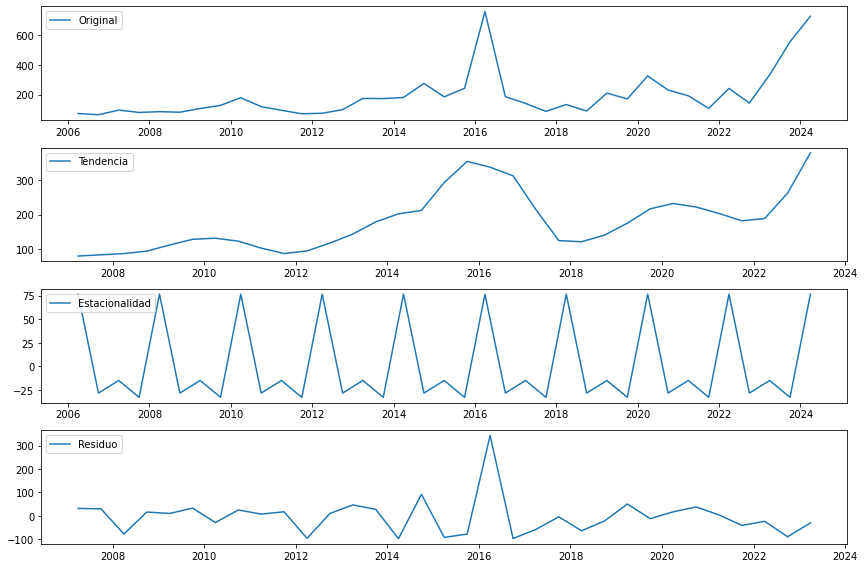

In [30]:
# Establece 'fechaoperacion' como el índice del DataFrame
df_vcs.set_index('fechaoperacion', inplace=True)

# Asegúrate de que la frecuencia esté definida (por ejemplo, mensual 'M')
df_vcs.index.freq = '2Q'

# Realizar la descomposición estacional de la serie temporal
result = seasonal_decompose(df_vcs['valor'], model='additive')

# Graficar la serie original, la tendencia, la estacionalidad y el residuo
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df_vcs['valor'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuo')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

#### Caso 3 (Anual): Promedio Movil

In [31]:
# creando una copia 
df_vca = df.copy()

# remuestreando de acuerdo a lo que se quiere trimestre
df_vca = df_resample(df_vca,type='Y')

# muestra
df_vca.head()

,fechaoperacion,valor
0,2006-12-31,73.839090
1,2007-12-31,83.252195
2,2008-12-31,87.834835
3,2009-12-31,139.280431
4,2010-12-31,128.732954


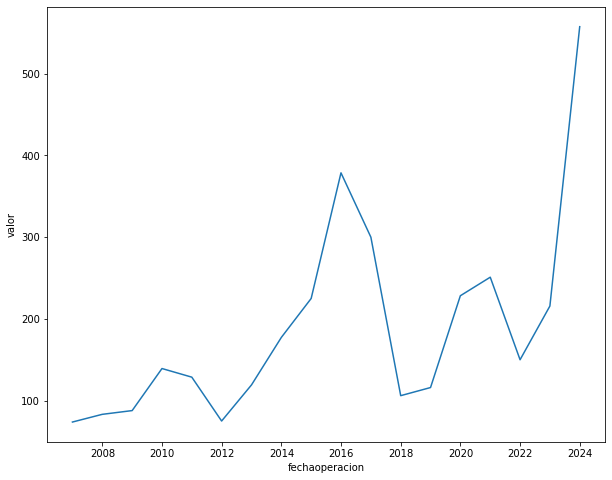

In [33]:
# creando grafico
plt.figure(figsize=(10,8))

# creando gráfico de linea
sns.lineplot(data=df_vca,x='fechaoperacion',y='valor')

# monstrando gráfico
plt.show()

#### Caso 3 (Anual): Rezagos

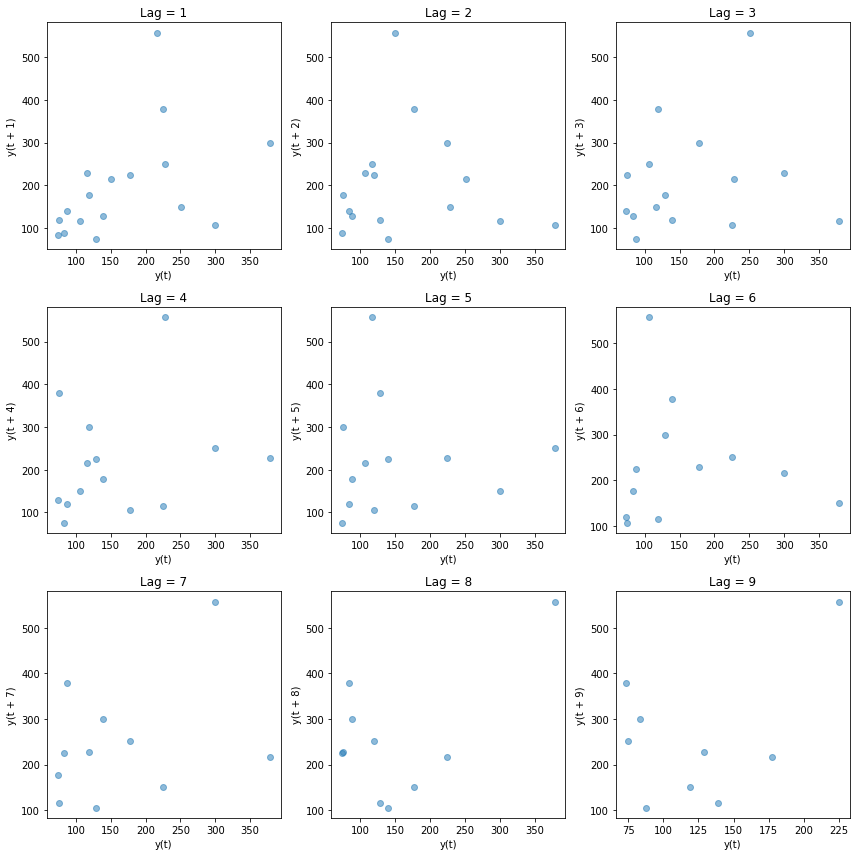

In [34]:
# Crear un panel de gráficos 3x3
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterar sobre las filas y columnas del panel
for i in range(3):
    for j in range(3):
        lag = i * 3 + j + 1  # Calcular el lag correspondiente
        ax = axes[i, j]  # Obtener el eje actual
        
        # Calcular y graficar el lag plot con el lag actual
        ax.plot(df_vca['valor'][:-lag], df_vca['valor'][lag:], 'o', alpha=0.5)
        ax.set_title(f'Lag = {lag}')
        ax.set_xlabel('y(t)')
        ax.set_ylabel(f'y(t + {lag})')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

#### Caso 3 (Anual): Estacionalidad

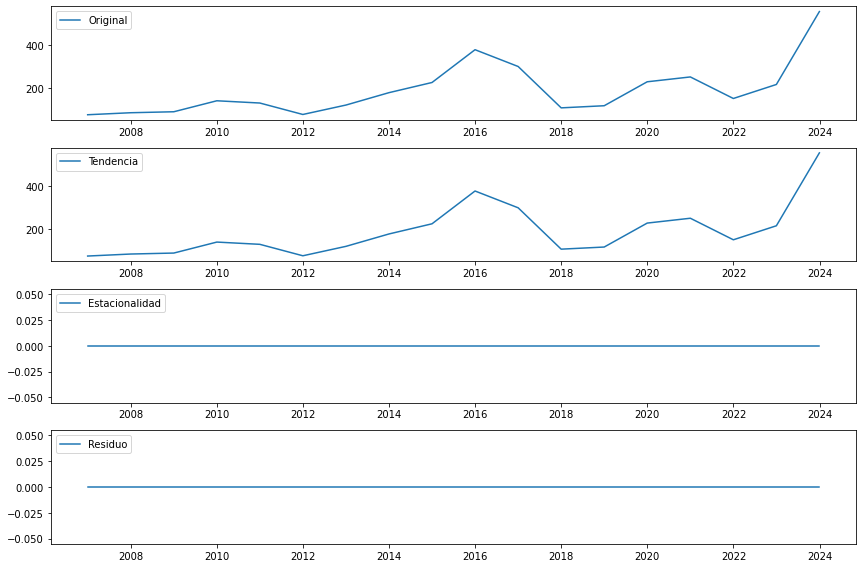

In [37]:
# Establece 'fechaoperacion' como el índice del DataFrame
df_vca.set_index('fechaoperacion', inplace=True)

# Asegúrate de que la frecuencia esté definida (por ejemplo, mensual 'M')
df_vca.index.freq = 'Y'

# Realizar la descomposición estacional de la serie temporal
result = seasonal_decompose(df_vca['valor'], model='additive')

# Graficar la serie original, la tendencia, la estacionalidad y el residuo
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df_vca['valor'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuo')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()